# **Exploratory Analysis of Critically Intensive Care Hospital Patients** 


## Table of Contents
1. Introduction
2. Initial Data Analysis (IDA)
    - 2.1 Data Overview
    - 2.2 Data Quality Assesment
    - 2.3 Data Cleaning
3. Exploratory Data Analysis (EDA)
    - 3.1 Outliers
4. Findings & Conclusion
   <br><br>


# 1. INTRODUCTION

The data set represents records of critically ill patients admitted across five US medical centres. The data was captured in two phases: 1989 to 1991 and 1992 to 1994. The research was funded by the Robert Wood Johnson Foundation, with an aim to support hospitalised critically ill patients by improving end-of-life decision making and ensuring patient preferences were correctly understood and reflected in the care they received.

In this analysis we will use the following libraries: Numpy, Matplotlib and Seaborn to conduct an **Initial Data Analysis (IDA)** to assess the data's structure and quality, followed by an **Exploratory Data Analysis (EDA)** involving descriptive statistics and visualisations to summarise and evaluate the data. Finally, we will explain key findings from the analysis for patient care. 

### Import Libaries and Load Dataset

In [1]:
# Import key libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset into dataframe

In [4]:
df = pd.read_csv('support2-1.csv')
df

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.000000
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.000000
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.000000
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9101,9102,55.15399,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9102,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9103,9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000


# 2. INITIAL DATA ANALYSIS (IDA)

We will use Intial Data Analysis (IDA) to examine the structure, quality of the data and completeness.

## 2.1 Data Overview

In [5]:
# Review the first 5 rows of data

In [6]:
df.head()

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
0,1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
1,2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
2,3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
3,4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
4,5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [7]:
# Examine the last 5 rows of data

In [8]:
df.tail()

,ID,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
9100,9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9101,9102,55.15399,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9102,9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9103,9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000
9104,9105,81.53894,1,female,0,12,198,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.199951,137.0,7.289062,187.0,15.0,NaN,0.0,NaN,no(M2 and SIP pres),0.494751


In [9]:
# Display the dimesions of the data

In [10]:
df.shape

(9105, 48)

In [11]:
# Shows summary of data structure 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [13]:
# The list of column names in dataset

In [14]:
df.columns

Index(['ID', 'age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')


#### Variable Definitions
The following variable descriptions are found in the data source website: https://archive.ics.uci.edu/dataset/880/support2

| Column Name | Description |
|------------|-------------|
| ID | Unique patient identification number |
| age | Age in years |
| death | Whether the patient died during the study (1 = yes) |
| sex | Biological sex (male/female) |
| hospdead | In-hospital death indicator (1 = yes) |
| slos | Length of hospital stay in days |
| d.time | Days from study entry to death or end of follow-up |
| dzgroup | Detailed disease group |
| dzclass | Broad disease category |
| num.co | Number of comorbidities |
| edu | Years of education |
| income | Income category |
| scoma | Coma score (0 = conscious, 40+ = coma, 80+ = deep coma) |
| charges | Total hospital charges |
| totcst | Total hospital cost |
| totmcst | Total medical cost including physician services |
| avtisst | Average TISS (nursing workload) score |
| race | Patient’s race |
| sps | Sickness score estimated by the physician |
| aps | Acute Physiology Score (severity of illness) |
| surv2m | Probability of surviving 2 months (model estimate) |
| surv6m | Probability of surviving 6 months (model estimate) |
| hday | Hospital day relative to study start |
| diabetes | Diabetes indicator (1 = yes) |
| dementia | Dementia indicator (1 = yes) |
| ca | Cancer status (none / non-metastatic / metastatic) |
| prg2m | Physician’s prediction of 2-month survival |
| prg6m | Physician’s prediction of 6-month survival |
| dnr | Do-Not-Resuscitate status |
| dnrday | Day DNR order was placed |
| meanbp | Mean arterial blood pressure (Day 3) |
| wblc | White blood cell count (Day 3) |
| hrt | Heart rate (Day 3) |
| resp | Respiratory rate (Day 3) |
| temp | Body temperature in °C (Day 3) |
| pafi | PaO₂/FiO₂ oxygenation ratio |
| alb | Serum albumin level (Day 3) |
| bili | Bilirubin level (Day 3) |
| crea | Serum creatinine (kidney function) |
| sod | Serum sodium |
| ph | Arterial blood pH |
| glucose | Blood glucose level |
| bun | Blood urea nitrogen |
| urine | Urine output (Day 3) |
| adlp | ADL score (patient report) |
| adls | ADL score (surrogate report) |
| sfdm2 | Functional disability score at 2 months |
| adlsc | Adjusted ADL score (calibrated) |


In [15]:
# List descriptive statistics for numerical columns

In [16]:
df.describe()

,ID,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [17]:
# List descriptive statistics for catergorical columns

In [18]:
df.select_dtypes(include='object').describe()


,sex,dzgroup,dzclass,income,race,ca,dnr,sfdm2
count,9105,9105,9105,6123,9063,9105,9075,7705
unique,2,8,4,4,5,3,3,5
top,male,ARF/MOSF w/Sepsis,ARF/MOSF,under $11k,white,no,no dnr,<2 mo. follow-up
freq,5125,3515,4227,2855,7191,5995,5880,3123


## 2.2 Data Quality Assessment

In [19]:
# Check for missing values in each column

In [20]:
df.isna().sum()

ID             0
age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
sfdm2       1400
adlsc          0
dtype: int64

In [21]:
# Display the number of duplicate rows

In [22]:
df.duplicated().sum()

np.int64(0)

## 2.3 Data Cleaning / Missing Values

In [23]:
# List the columns of missing values from descending order

In [24]:
df.isna().sum().sort_values(ascending=False)

adlp        5641
urine       4862
glucose     4500
bun         4352
totmcst     3475
alb         3372
income      2982
adls        2867
bili        2601
pafi        2325
ph          2284
prg2m       1649
edu         1634
prg6m       1633
sfdm2       1400
totcst       888
wblc         212
charges      172
avtisst       82
crea          67
race          42
dnrday        30
dnr           30
meanbp         1
hrt            1
resp           1
surv6m         1
surv2m         1
aps            1
sps            1
temp           1
scoma          1
sod            1
ID             0
dementia       0
ca             0
age            0
diabetes       0
hday           0
num.co         0
dzclass        0
dzgroup        0
d.time         0
slos           0
hospdead       0
sex            0
death          0
adlsc          0
dtype: int64

The dataset contains shows multiple variables containing missing data. The columns with the highest missing information could suggest that functional and clincal results were not recorded such as *adlp*, *urine output*, *glucose*, *bun*, and *alb*.


In [25]:
#Check 'age' column datatype

In [26]:
df['age'].dtype

dtype('float64')

In [27]:
# Convert 'age' from float datatype to integer

In [28]:
df['age']=df['age'].astype(int)

In [29]:
# Display missing value heatmap

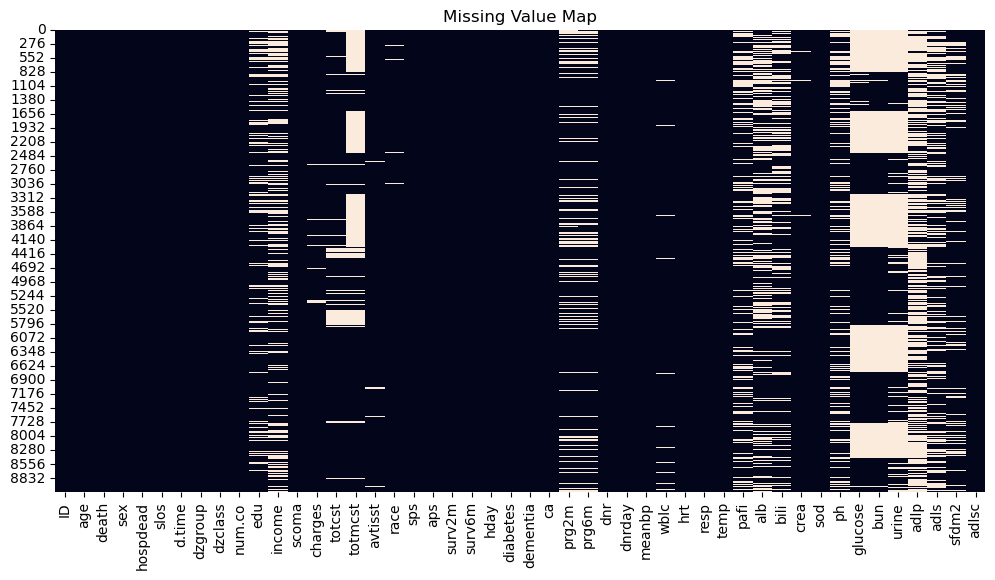

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Map")
plt.show()

In [31]:
# Create a copy of original Dataframe

In [32]:
df1 = df.copy()


In [33]:
# Display percentage of missing values in each column

In [34]:
missing_percent = (df1.isna().sum() / len(df1)) * 100
missing_percent

ID           0.000000
age          0.000000
death        0.000000
sex          0.000000
hospdead     0.000000
slos         0.000000
d.time       0.000000
dzgroup      0.000000
dzclass      0.000000
num.co       0.000000
edu         17.946183
income      32.751236
scoma        0.010983
charges      1.889072
totcst       9.752883
totmcst     38.165843
avtisst      0.900604
race         0.461285
sps          0.010983
aps          0.010983
surv2m       0.010983
surv6m       0.010983
hday         0.000000
diabetes     0.000000
dementia     0.000000
ca           0.000000
prg2m       18.110928
prg6m       17.935200
dnr          0.329489
dnrday       0.329489
meanbp       0.010983
wblc         2.328391
hrt          0.010983
resp         0.010983
temp         0.010983
pafi        25.535420
alb         37.034596
bili        28.566722
crea         0.735859
sod          0.010983
ph          25.085118
glucose     49.423394
bun         47.797913
urine       53.399231
adlp        61.954970
adls      

In [35]:
# Identify columns with more than 50% of missing data.

In [36]:
missing_percent[missing_percent > 50].index

Index(['urine', 'adlp'], dtype='object')

These columns are missing over 50% percentage of missing data. These were not dropped. The dataset documentation explains some missing values reflect the patients condition and also provides recommended imputation values for specific variables. These have been applied below. Categorical variables were imputed with 'Unknown' and remaining missing values were left as NaN to ensure important clincal information is kept. https://archive.ics.uci.edu/dataset/880/support2 

| Baseline Variable|	Normal Fill-in Value|
|------|------|
|Serum albumin (alb)|3.5|
|PaO2/FiO2 ratio (pafi)|333.3|
|Bilirubin (bili)|1.01|
|Creatinine (crea)|1.01|
|bun| 6.51|
|White blood count (wblc)|9 (thousands)|
|Urine output (urine)|2502|

In [37]:
# Count number of missing values in 'urine', 'alb', 'pafi', 'bili', 'crea', 'bun', 'wblc' columns

In [38]:
df1[['urine','alb','pafi','bili','crea','bun','wblc']].isna().sum()

urine    4862
alb      3372
pafi     2325
bili     2601
crea       67
bun      4352
wblc      212
dtype: int64

In [39]:
# Fill in columns 'urine', 'alb', 'pafi', 'bili', 'crea', 'bun', 'wblc' with default values

In [40]:
df1['urine'] = df1['urine'].fillna(2502)
df1['alb'] = df1['alb'].fillna(3.5)
df1['pafi'] = df1['pafi'].fillna(333.3)
df1['bili'] = df1['bili'].fillna(1.01)
df1['crea'] = df1['crea'].fillna(1.01)
df1['bun'] = df1['bun'].fillna(6.51)
df1['wblc'] = df1['wblc'].fillna(9000)

In [41]:
# Verify the number of missing values in columns 'urine', 'alb', 'pafi', 'bili', 'crea', 'bun', 'wblc'

In [42]:
df1[['urine','alb','pafi','bili','crea','bun','wblc']].isna().sum()


urine    0
alb      0
pafi     0
bili     0
crea     0
bun      0
wblc     0
dtype: int64

In [43]:
# Verify percentage of missing values 

In [44]:
missing_percent = (df1.isna().sum() / len(df1)) * 100
missing_percent

ID           0.000000
age          0.000000
death        0.000000
sex          0.000000
hospdead     0.000000
slos         0.000000
d.time       0.000000
dzgroup      0.000000
dzclass      0.000000
num.co       0.000000
edu         17.946183
income      32.751236
scoma        0.010983
charges      1.889072
totcst       9.752883
totmcst     38.165843
avtisst      0.900604
race         0.461285
sps          0.010983
aps          0.010983
surv2m       0.010983
surv6m       0.010983
hday         0.000000
diabetes     0.000000
dementia     0.000000
ca           0.000000
prg2m       18.110928
prg6m       17.935200
dnr          0.329489
dnrday       0.329489
meanbp       0.010983
wblc         0.000000
hrt          0.010983
resp         0.010983
temp         0.010983
pafi         0.000000
alb          0.000000
bili         0.000000
crea         0.000000
sod          0.010983
ph          25.085118
glucose     49.423394
bun          0.000000
urine        0.000000
adlp        61.954970
adls      

In [45]:
# Replace categorical columns with 'Unknown'

In [46]:
df1['income'] = df1['income'].fillna('Unknown')
df1['race']   = df1['race'].fillna('Unknown')
df1['dnr']    = df1['dnr'].fillna('Unknown')
df1['dzgroup'] = df1['dzgroup'].fillna('Unknown')
df1['dzclass'] = df1['dzclass'].fillna('Unknown')

In [47]:
# Confirm the number of missing values 

In [48]:
df1.isna().sum().sort_values(ascending=False)

adlp        5641
glucose     4500
totmcst     3475
adls        2867
ph          2284
prg2m       1649
edu         1634
prg6m       1633
sfdm2       1400
totcst       888
charges      172
avtisst       82
dnrday        30
hrt            1
aps            1
resp           1
temp           1
surv6m         1
surv2m         1
meanbp         1
sps            1
scoma          1
sod            1
bili           0
alb            0
pafi           0
wblc           0
crea           0
bun            0
urine          0
ID             0
dementia       0
dnr            0
ca             0
age            0
diabetes       0
hday           0
race           0
income         0
num.co         0
dzclass        0
dzgroup        0
d.time         0
slos           0
hospdead       0
sex            0
death          0
adlsc          0
dtype: int64

In [49]:
# Fill missing values with median

In [50]:
df1['glucose']=df1['glucose'].fillna(df1['glucose'].median())
df1['totmcst']=df1['totmcst'].fillna(df1['totmcst'].median())

Missing values for glucose and total medical cost were imputed with the median as it's not affected by extreme outliers. This retains patient records without removing important clinical information.

In [51]:
# Check missing values

In [52]:
df1.isna().sum().sort_values(ascending=False)

adlp        5641
adls        2867
ph          2284
prg2m       1649
edu         1634
prg6m       1633
sfdm2       1400
totcst       888
charges      172
avtisst       82
dnrday        30
surv2m         1
aps            1
sps            1
resp           1
hrt            1
meanbp         1
scoma          1
temp           1
sod            1
surv6m         1
wblc           0
ID             0
pafi           0
alb            0
crea           0
glucose        0
bun            0
urine          0
bili           0
dementia       0
dnr            0
dzclass        0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
num.co         0
ca             0
income         0
totmcst        0
race           0
hday           0
diabetes       0
age            0
adlsc          0
dtype: int64

In [53]:
# Rename columns for better readability

In [54]:
clean_df = df1.rename(columns={
    'ID': 'id',
    'age': 'age',
    'sex': 'gender',
    'hospdead': 'hospital_death',
    'slos': 'study_los',
    'd.time': 'followup_days',
    'dzgroup': 'disease_subgroup',
    'dzclass': 'disease_class',
    'num.co': 'comorbidity_count',
    'edu': 'education_years',
    'income': 'income',
    'scoma': 'scoma_score',
    'charges': 'hospital_charges',
    'totcst': 'total_cost',
    'totmcst': 'medical_cost',
    'avtisst': 'avg_tiss_score',
    'race': 'race',
    'sps': 'sickness_score',
    'aps': 'apache_score',
    'surv2m': 'prob_survival_2m',
    'surv6m': 'prob_survival_6m',
    'hday': 'hospital_day',
    'diabetes': 'diabetes',
    'dementia': 'dementia',
    'ca': 'cancer_status',
    'prg2m': 'physician_survival_2m',
    'prg6m': 'physician_survival_6m',
    'dnr': 'dnr_status',
    'dnrday': 'dnr_day',
    'meanbp': 'mean_bp',
    'wblc': 'wbc_count',
    'hrt': 'heart_rate',
    'resp': 'resp_rate',
    'temp': 'temp_c',
    'pafi': 'pafi_ratio',
    'alb': 'albumin',
    'bili': 'bilirubin',
    'crea': 'creatinine',
    'sod': 'sodium',
    'ph': 'blood_ph',
    'glucose': 'glucose',
    'bun': 'bun',
    'urine': 'urine_output',
    'adlp': 'adl_patient',
    'adls': 'adl_surrogate',
    'sfdm2': 'disability_2m',
    'adlsc': 'adl_score'
})
clean_df

,id,age,death,gender,hospital_death,study_los,followup_days,disease_subgroup,disease_class,comorbidity_count,...,creatinine,sodium,blood_ph,glucose,bun,urine_output,adl_patient,adl_surrogate,disability_2m,adl_score
0,1,62,0,male,0,5,2029,Lung Cancer,Cancer,0,...,1.199951,141.0,7.459961,135.0,6.51,2502.0,7.0,7.0,NaN,7.000000
1,2,60,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,...,5.500000,132.0,7.250000,135.0,6.51,2502.0,NaN,1.0,<2 mo. follow-up,1.000000
2,3,52,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,...,2.000000,134.0,7.459961,135.0,6.51,2502.0,1.0,0.0,<2 mo. follow-up,0.000000
3,4,42,1,female,0,3,133,Lung Cancer,Cancer,2,...,0.799927,139.0,NaN,135.0,6.51,2502.0,0.0,0.0,no(M2 and SIP pres),0.000000
4,5,79,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,0.799927,143.0,7.509766,135.0,6.51,2502.0,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,9101,66,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,1.099854,131.0,7.459961,188.0,21.00,2502.0,NaN,0.0,NaN,0.000000
9101,9102,55,0,female,0,29,347,Coma,Coma,1,...,5.899414,135.0,7.289062,190.0,49.00,0.0,NaN,0.0,NaN,0.000000
9102,9103,70,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,...,2.699707,139.0,7.379883,189.0,60.00,3900.0,NaN,NaN,NaN,2.525391
9103,9104,47,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,...,3.500000,135.0,7.469727,246.0,55.00,2502.0,NaN,0.0,<2 mo. follow-up,0.000000


In [55]:
clean_df.shape

(9105, 48)

# 3. EXPLORATORY DATA ANALYSIS (EDA)

EDA builds upon the IDA foundation, giving deeper insights into trends that can help decision making processes. In this assignment we will use descriptive stats and visualisation techniques to develop a better understanding on the clinical, physiological and demographic aspects of the study.   

## 3.1 Outliers

Outliers represent data that fall out of a normal range for a specific variable.  Box plots are used to examine outliers as they are able to effectively visualise extreme values.

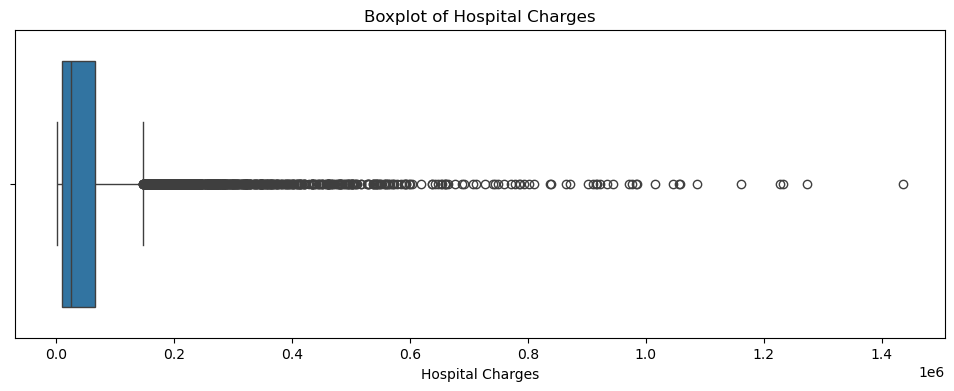

In [56]:
#Plot boxplot
plt.figure(figsize=(12,4))
sns.boxplot(x=clean_df['hospital_charges'].dropna())
plt.title('Boxplot of Hospital Charges')
plt.xlabel('Hospital Charges')
plt.show()


- The box plot is heavily positively skewed and small interquartile range (IQR) indicating most patients usually have low hospital charges
-  There are many outliers representing patients with extreme medical costs. These reflect patients who either have extreme medical cases, require longer medical supervison or have an extensive treatment plans

## 3.1.1 Comparison of Hospital Charges Across Cancer Groups:

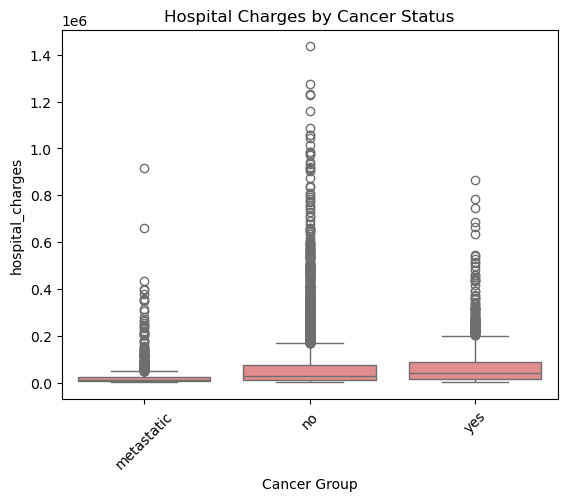

In [57]:
#Plot boxplot
sns.boxplot(x='cancer_status', y='hospital_charges', data=clean_df, color='lightcoral')
plt.xticks(rotation=45)
plt.title('Hospital Charges by Cancer Status')
plt.xlabel('Cancer Group')
plt.show()

- Boxplot show charges across cancer groups are positively skewed meaning patients on average have low hospital costs while few cases have exceptionally high costs
- Non-cancer patients show the highest outliers indicating high costs this group are due to prolonged care and monitoring rather than actual cancer treatment
- Non metstatic cancer patients have higher costs and many outliers as active cancer treatment requires longer admissions and on going extensive cancer treatment
- Care for mestatic cancer patients at this stage usually focuses on palliative treatment, leading to lower costs and outliers

## 3.1.2 Outliers in White Blood Cell Count

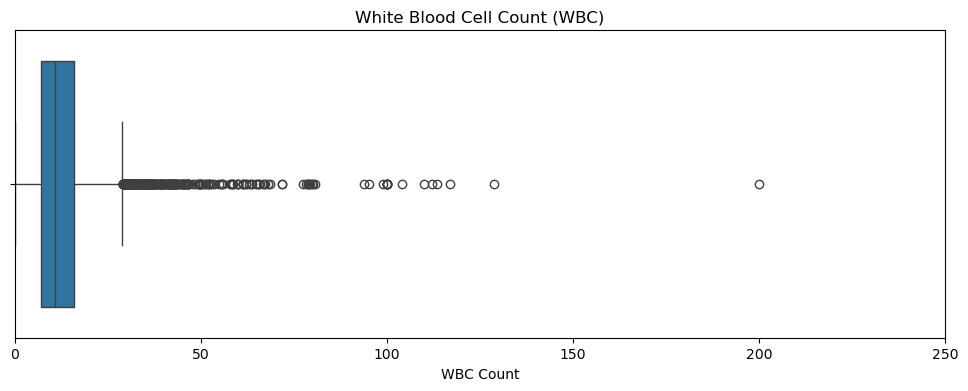

In [58]:
#Plot boxplot

plt.figure (figsize=(12,4))
sns.boxplot(x=clean_df['wbc_count'].dropna())
plt.title ('White Blood Cell Count (WBC)')
plt.xlabel('WBC Count')
plt.xlim(0, 250) 
plt.show()

-  White blood cell counts of patients are highly positively skewed and IQR is low which show WBC levels in most patients are within the normal or midily elevated range
-  However several extreme outliers suggest there's a high number of critically ill patients. High levels of WBC indicate severe levels of infection, inflammation or sepsis

## 3.1.3 Boxplot of Glucose Levels

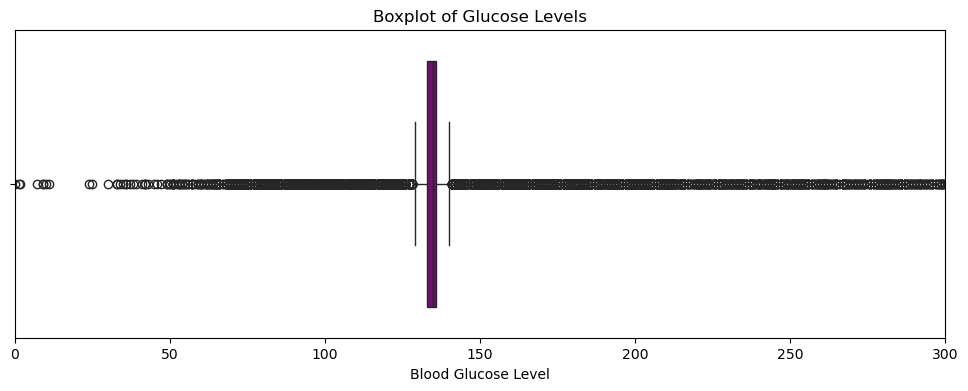

In [59]:
plt.figure(figsize=(12,4)) 
sns.boxplot(x=clean_df['glucose'].dropna(), color='purple', width=0.8) 
plt.title('Boxplot of Glucose Levels') 
plt.xlabel('Blood Glucose Level')
plt.xlim(0, 300) 
plt.show() 

- Most patients have normal to moderately elevated glucose levels.
- The boxplot shows extreme outliers on both ends of the boxplot.
- Abnormally high glucose (hyperglycemia) and low glucose levels (hypoglycemia)suggest severe illnesses such as diabetes, infection or organ failure.

## 3.2 Age vs Length of Hospital Stay

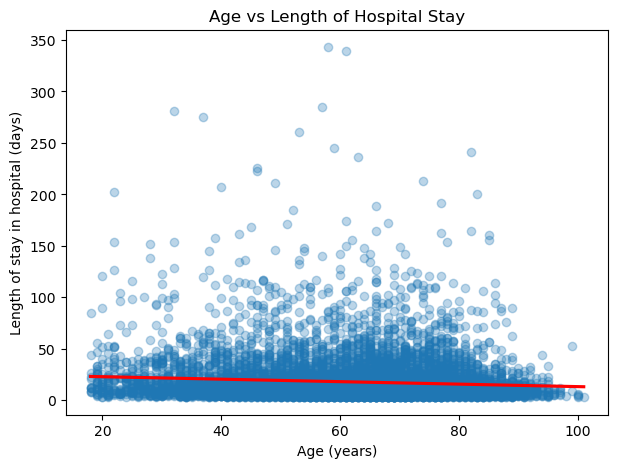

In [60]:
# Plot scatterplot with regression line

plt.figure(figsize=(7, 5))
sns.regplot(x='age', y='study_los', data=clean_df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Age vs Length of Hospital Stay')
plt.xlabel('Age (years)')
plt.ylabel('Length of stay in hospital (days)')
plt.show()

- The plot shows no clear trend between length of hospital stay and age. The regression line indicates little to no linear association. 
- Patients of all ages tend to have similarly short stays, while long hospital stays occur across the entire age range. This suggests that age does not meaningfully predict length of stay and that other clinical factors are likely responsible for prolonged hospital admissions.

In [61]:
# Find correlations between age and length of stay
pearson_age_slos = clean_df['age'].corr(clean_df['study_los'])         
spearman_age_slos = clean_df['age'].corr(clean_df['study_los'], method='spearman')  

print(f"Pearson correlation (age vs slos):  {pearson_age_slos:.3f}")
print(f"Spearman correlation (age vs slos): {spearman_age_slos:.3f}")


Pearson correlation (age vs slos):  -0.085
Spearman correlation (age vs slos): -0.063


- Both Pearson (–0.085) and Spearman (–0.063) correlations are very close to zero, indicating age and length of hospital stay are weakly negatively related.
- Older patients tend to stay slightly fewer days, however the effect is so small that we cannot claim a meaningful correlation between age and hospital length of stay.

## 3.3 Age Distribution by Death Outcome

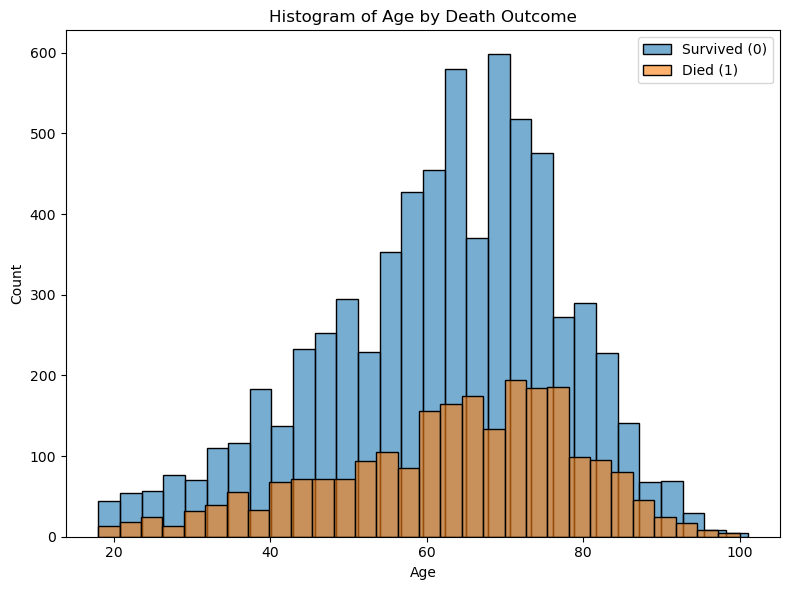

In [62]:
# Plot histogram
plt.figure(figsize=(8, 6))

sns.histplot(clean_df[clean_df['hospital_death'] == 0]['age'],
         bins=30, alpha=0.6, label='Survived (0)')

sns.histplot(clean_df[clean_df['hospital_death'] == 1]['age'],
         bins=30, alpha=0.6, label='Died (1)')

plt.title("Histogram of Age by Death Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


- The histogram shows a strong correlation of the risk of increased death with increased age; death increases above age 50 and peaks around 60-75 years old. 
- Younger patients have few recorded deaths and there are higher chances of survival amongst younger and middle aged patients, This pattern indicates that age is a key factor associated with mortality risk.



## 3.4 Mortality Rate by Income Group

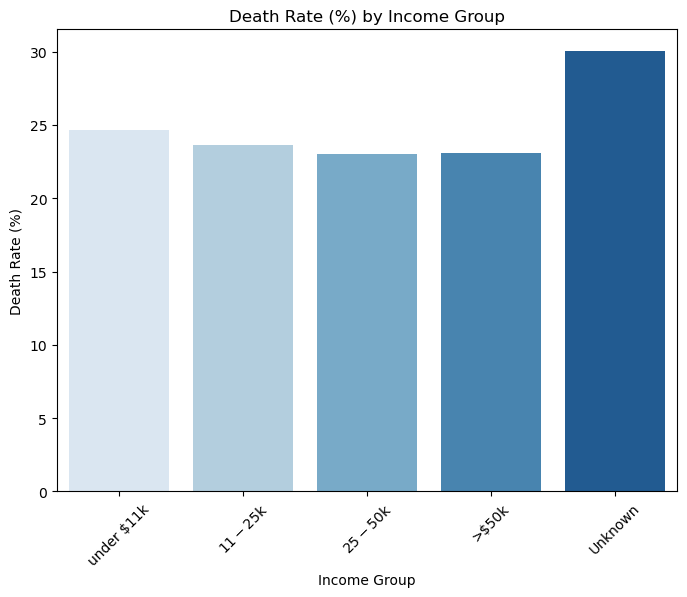

In [63]:
# Calculate death rate for each income group
death_rate = clean_df.groupby('income')['hospital_death'].mean() * 100

# Reorder groups
death_rate = death_rate.loc[['under $11k', '$11-$25k', '$25-$50k', '>$50k', 'Unknown']]

#Plot barchart
plt.figure(figsize=(8,6))
sns.barplot(x=death_rate.index, y=death_rate.values, hue=death_rate.index, palette='Blues')

plt.xticks(rotation=45)
plt.title('Death Rate (%) by Income Group')
plt.ylabel('Death Rate (%)')
plt.xlabel('Income Group')
plt.show()


- The barchart shows the highest death rate is in the "Unknown" income group. This may reflect incorrectly captured or unrecorded income data rather than a real effect of income. 

- Groups with reported income recorded similiar death rates, falling approximately between 23-25%. The slight variation shows there's not a direct association between income and mortality in this dataset. However due to the difference in the size of income group sizes could influence these results.

## 3.5 Race vs Death Rate

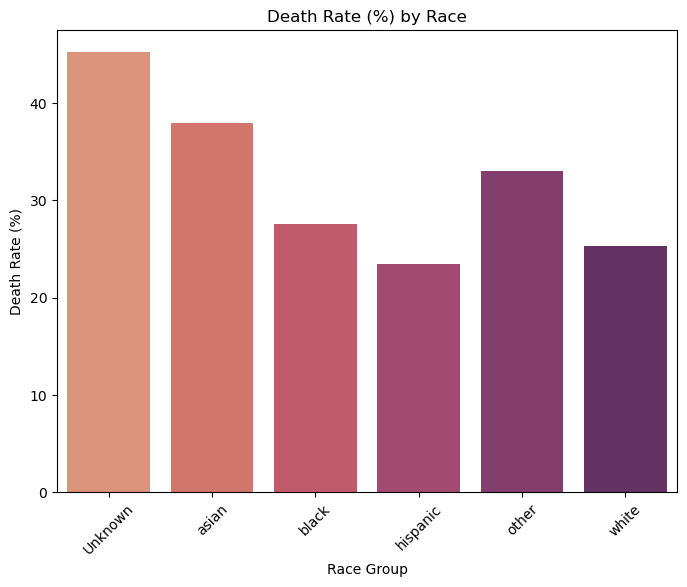

In [64]:
# Calculate death percentage per race
death_rate_race = clean_df.groupby('race')['hospital_death'].mean() * 100

#Plot barchart
plt.figure(figsize=(8,6))
sns.barplot(x=death_rate_race.index, y=death_rate_race.values, hue=death_rate_race.index, palette='flare')

plt.title('Death Rate (%) by Race')
plt.xlabel('Race Group')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.show()


- Highest death rates occured in "Unknown" and "Other" race groups mostly due to missing or incomplete documentation.
- Asian patients show the highest death rate, followed by Black, White, and Hispanic patients.
- Race does not a consistent pattern across groups.

## 3.6 Distribution of Scoma Scores

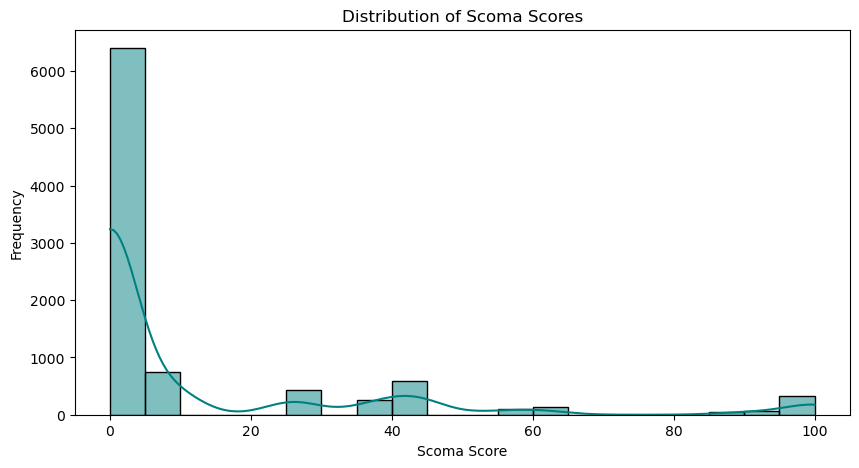

In [65]:
# Plot Histogram

plt.figure(figsize=(10,5))
sns.histplot(clean_df['scoma_score'], bins=20, kde=True, color='teal')
plt.xlabel('Scoma Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scoma Scores')
plt.show()


- The histogram shows the distribution of Scoma scores, ranging from 0 to 100. A score of 0 indicates a fully conscious patient, while a score of 100 indicates a severe coma.

- Most patients had Scoma scores between 0 and 10, meaning they were fully conscious or only slightly impaired. Only a very small number of patients had a Scoma score above 40. This is likely because severely ill patients with high Scoma scores had an increased mortality rate.
Overall, the histogram shows a strongly right-skewed distribution.

## 3.7 Scoma Score vs Survival Outcome

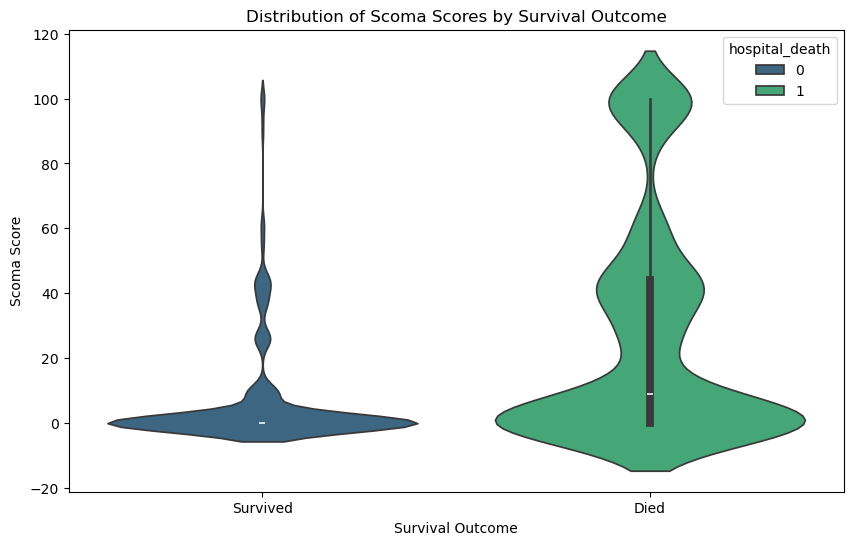

In [86]:
# Plot Violin plot 
plt.figure(figsize=(10,6))
sns.violinplot(data=clean_df, x='hospital_death', y='scoma_score', hue='hospital_death', palette='viridis', inner='box')

plt.xticks([0,1], ['Survived', 'Died'])
plt.xlabel('Survival Outcome')
plt.ylabel('Scoma Score')
plt.title('Distribution of Scoma Scores by Survival Outcome')
plt.show()

- The violin plot shows the distribution of the scoma scores of those who survived and died in hospital. The survival group had very low scoma scores between 0 to 5. A small amount of survivors had a scoma score above 20. 
- Patients who died in hospital had scoma scores that showed a significanlty wider spread and were more heavily concentrated in
  the 0–20 range, 40-60 range and the 100-120 range. 
- Patients who died in hospital had a much higher Scoma scores overall, reflecting more severe levels of illnesses. This is expected as greater scores are associated with increased mortality rates. The death group show a significantly mcuh larger median scoma score compared to the survived group. 

## 3.8 Distribution of Sickness score (SPS)


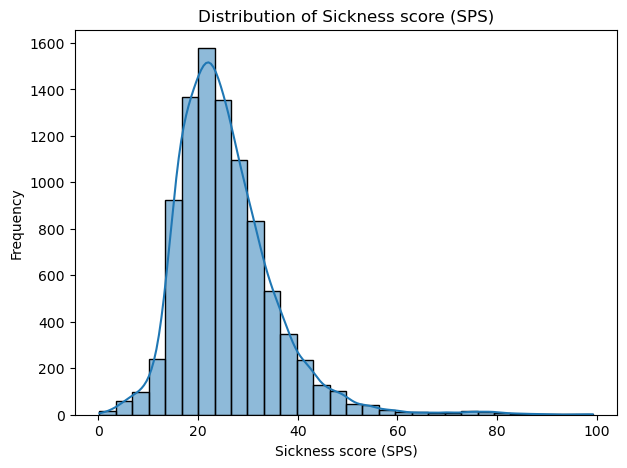

In [67]:
plt.figure(figsize=(7,5))
sns.histplot(clean_df['sickness_score'].dropna(), bins=30, kde=True)
plt.title('Distribution of Sickness score (SPS)')
plt.xlabel('Sickness score (SPS)')
plt.ylabel('Frequency')
plt.show()

- The distribution of the SPS (Sickness Score) is assesed to understand how sickness severity is spread across the patient population. 
The histogram shows a clear single peak between Sickness score (SPS) values of around 20 and 30, meaning most patients fall into a moderate sickness range. The shape is right-skewed, indicating that while severe sickness does occur, it's less common. 

- Very low scores are rare, and the KDE curve reinforces that the majority of patients have moderate physiological dysfunction, with only a smaller group showing very high SPS values.

## 3.9 Sickness Severity Distribution by Death Outcome

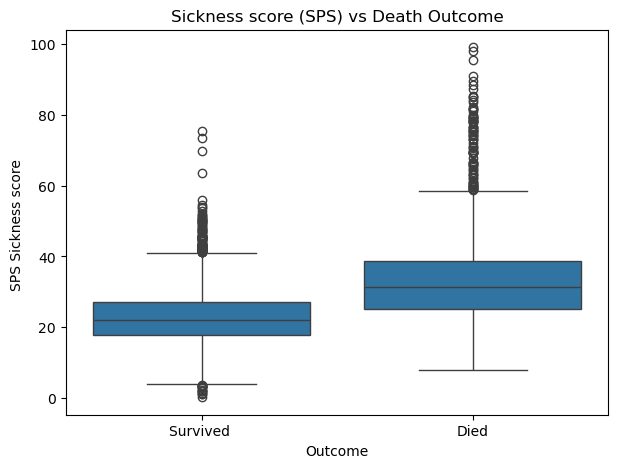

In [68]:
plt.figure(figsize=(7,5))
sns.boxplot(x='hospital_death', y='sickness_score', data=clean_df)
plt.xticks([0,1], ['Survived ', 'Died'])
plt.title('Sickness score (SPS) vs Death Outcome')
plt.xlabel('Outcome')
plt.ylabel('SPS Sickness score ')
plt.show()

The boxplot compares sickness severity (SPS score) between patients who lived and those who died. 
The group that died had higher SPS scores overall, with a higher median and many more extreme high values. This indicates that patients who died generally had more severe physiological dysfunction than those who survived.

In [69]:
# Correlation (SPS treated as continuous, death as 0/1)
r_sps_death = clean_df['sickness_score'].corr(clean_df['hospital_death'])
print(f"\nPearson correlation (SPS vs death): {r_sps_death:.3f}")


Pearson correlation (SPS vs death): 0.463


In [70]:
clean_df.groupby('hospital_death')['sickness_score'].describe()

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,6745.0,22.817916,7.299550,0.199982,17.699219,22.097656,27.097656,75.5000
1,2359.0,33.268630,12.040455,7.799805,25.199219,31.398438,38.593750,99.1875


- Mean SPS for alive (death = 0): 22.8

- Mean SPS for dead (death = 1): 33.3

- The boxplot shows that the death group has a higher median SPS and a wider spread, with more high-score outliers.

- Pearson correlation between SPS and death is r = 0.463: a moderate positive correlation.

Higher SPS (worse physiological status) is associated with a higher probability of death. The is correlation moderately strong but other factors contribute to mortality.

## 3.10 Distribution of Number of Comorbidities by Death Outcome

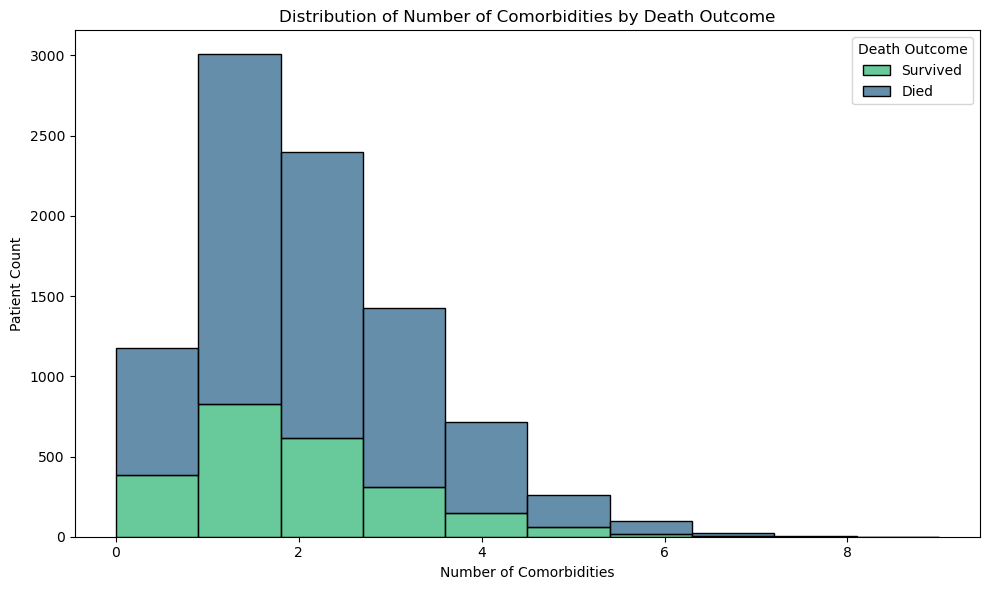

In [71]:
plt.figure(figsize=(10,6))

sns.histplot(data=clean_df,x= 'comorbidity_count', hue='hospital_death', multiple='stack',
bins=10, palette='viridis')

plt.title("Distribution of Number of Comorbidities by Death Outcome")
plt.xlabel("Number of Comorbidities")
legend = plt.gca()
legend.legend(title="Death Outcome", labels=["Survived", "Died"])


plt.ylabel("Patient Count")
plt.tight_layout()
plt.show()

- The histogram illustrates the distribution of comorbidities amongst the patients, separated by death outcome. The histogram illustrates patients with fewer comorbidities 0-2 are more likely to have survived. As the number of comorbidities increases to 3 or more, the number of surviving patients decreases, whilst the number deceased patients increase. 
- There are only a few patients with 6 or more comorbidities, and these patients are more likely to have died. Further suggesting that the number of comorbidities is correlated with the likelihood of death; patients with more comorbidities are at higher risk of death.

## 3.11 Age Distribution of Most Common Disease

In [72]:
# Count number of patients in each disease group
disease_counts = clean_df['disease_subgroup'].value_counts()
disease_counts

disease_subgroup
ARF/MOSF w/Sepsis    3515
CHF                  1387
COPD                  967
Lung Cancer           908
MOSF w/Malig          712
Coma                  596
Colon Cancer          512
Cirrhosis             508
Name: count, dtype: int64

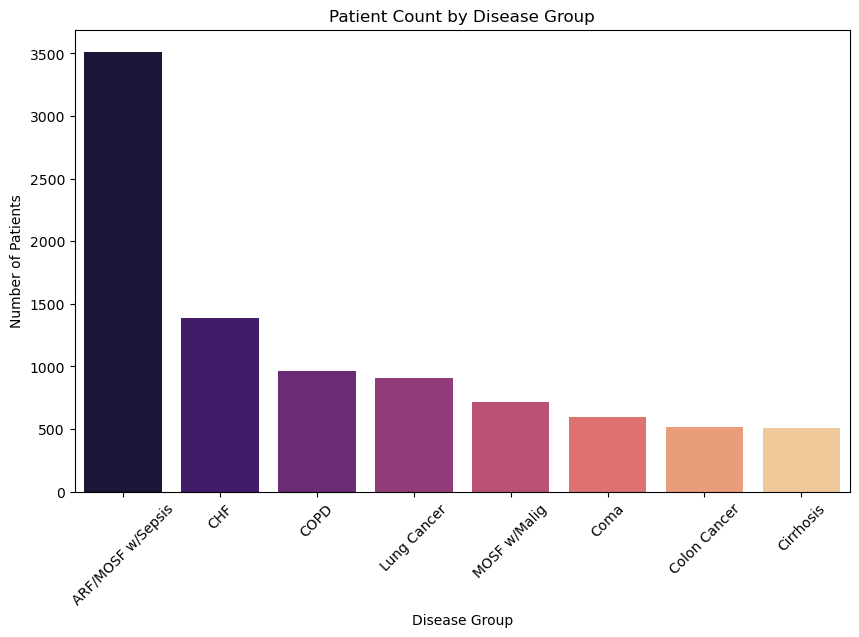

In [82]:
#Plot barchart
plt.figure(figsize=(10,6))
sns.barplot(x=disease_counts.index, y=disease_counts.values, hue=disease_counts.index, palette='magma')
plt.xticks(rotation=45)
plt.title('Patient Count by Disease Group')
plt.ylabel('Number of Patients')
plt.xlabel('Disease Group')
plt.show()

In [74]:
# Lists disease with highest count
most_common_disease = disease_counts.idxmax()
most_common_disease

'ARF/MOSF w/Sepsis'

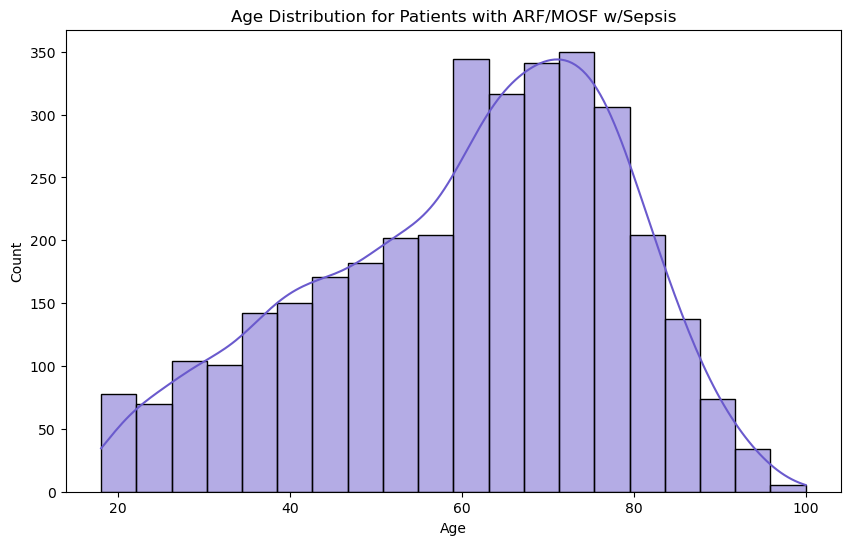

In [75]:
# Filter the dataframe to only include that 'ARF/MOSF w/Sepsis'
common_df = clean_df[clean_df['disease_subgroup'] == most_common_disease]
plt.figure(figsize=(10,6))
sns.histplot(common_df['age'], bins=20, kde=True, color='#6A5ACD')
plt.title(f'Age Distribution for Patients with {most_common_disease}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


- ARF/MOSF with sepsis occurs mostly in patients aged between 60 - 80. This is expected, as older adults often have weaker immune systems, making them vulnerable to severe infections such as sepsis and more likely at risk of developing organ failure which is harder them to recover from. Illnesses this severe are often fatal for this age group if not treated urgently.

## 3.12 Glucose Level Correlation with Death and Other Illnesses

In [76]:
# Correlation of glucose with survival outcomes / illnesses
for col in ['hospital_death', 'comorbidity_count', 'diabetes']:
    r = clean_df['glucose'].corr(clean_df[col])
    print(f"Pearson correlation (glucose vs {col}): {r:.3f}")


Pearson correlation (glucose vs hospital_death): 0.005
Pearson correlation (glucose vs comorbidity_count): 0.015
Pearson correlation (glucose vs diabetes): 0.028


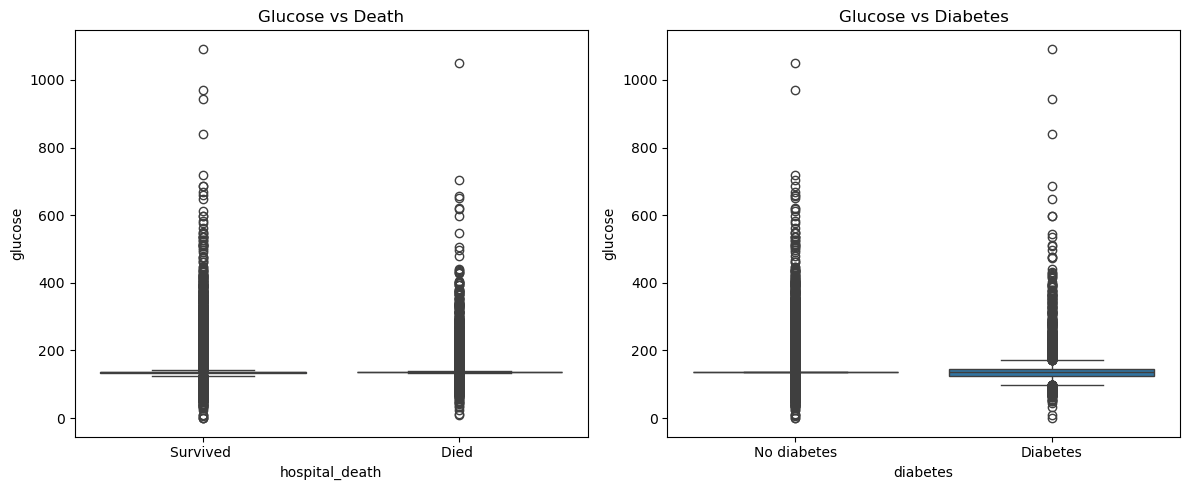

In [77]:
#Plot boxplots

#Glucose vs death
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(x='hospital_death', y='glucose', data=clean_df)
plt.xticks([0,1], ['Survived ', 'Died '])
plt.title('Glucose vs Death')

#Glucose vs Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='glucose', data=clean_df)
plt.xticks([0,1], ['No diabetes', 'Diabetes'])
plt.title('Glucose vs Diabetes')

plt.tight_layout()
plt.show()

- The boxplots displays similar glucose levels are similar across all groups. Distributions for survived and died group overlap and median glucose values are almost the same. Diabetic patients show slightly higher values however this difference is small. 
- The correlations confirm this: all Pearson coefficients are close to zero, indicating no strong linear relationship between glucose and death, hospital death, comorbidity count, or diabetes.
- Overall, glucose levels do not differ greatly between groups, and in this dataset, higher glucose is not strongly associated with mortality or illness severity. This suggests that glucose alone is not a strong predictor of outcome in this patient population.

## 3.13 Comparing Physician Survival Predictions vs Actual Outcomes

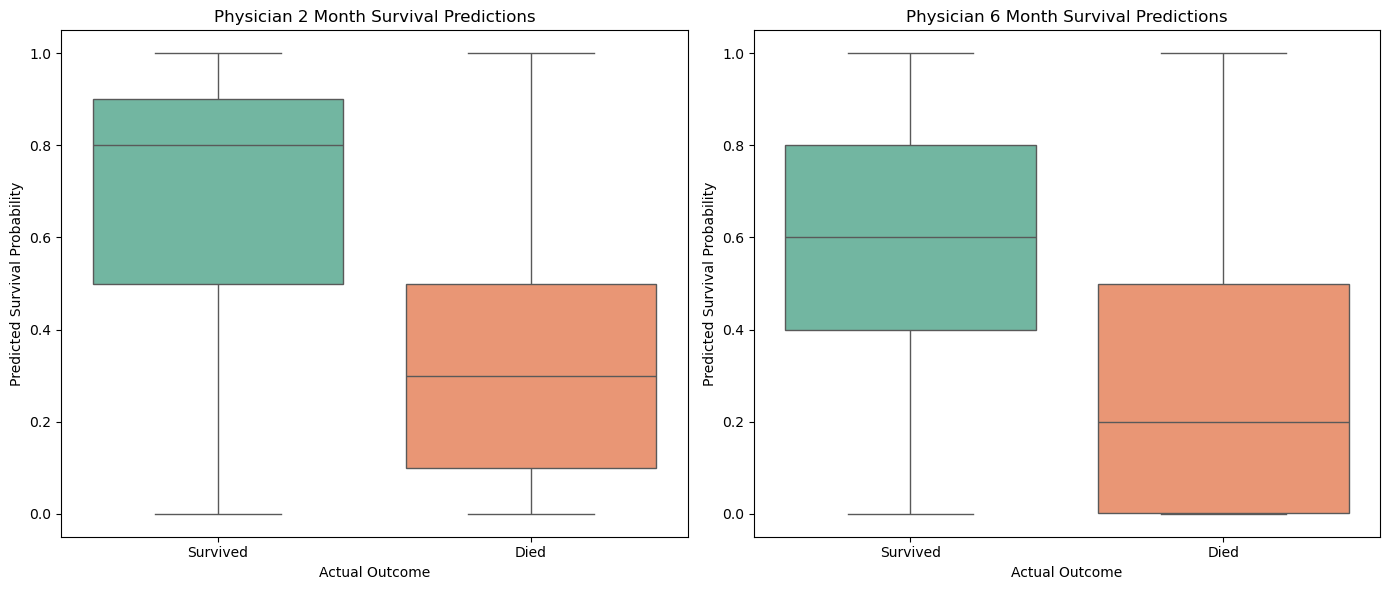

In [83]:
# Plot graphs side by side 
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# 1st plot: 2months survival prediction
sns.boxplot(ax=axes[0], data=clean_df, x='hospital_death', y='physician_survival_2m', hue='hospital_death', palette='Set2')
axes[0].set(
    xticks=[0,1],
    xticklabels=['Survived', 'Died'],
    title='Physician 2 Month Survival Predictions',
    xlabel='Actual Outcome',
    ylabel='Predicted Survival Probability')
axes[0].legend_.remove()

# 2nd plot: 6 months survival prediction
sns.boxplot( ax=axes[1], data=clean_df, x='hospital_death', y='physician_survival_6m',hue='hospital_death', palette='Set2')
axes[1].set(
    xticks=[0,1],
    xticklabels=['Survived', 'Died'],
    title='Physician 6 Month Survival Predictions',
    xlabel='Actual Outcome',
    ylabel='Predicted Survival Probability')
axes[1].legend_.remove()

plt.tight_layout()
plt.show()

**2 month predictions**: 
The boxplot shows that physicians were largely accurate in their survival predictions. Patients who survived received higher survival predictions, while those who died received lower predictions. However, the slight overlap between the two groups suggest few predicitons were uncertaim, physicians were mostly correct in predicting short term survival outcomes.

**6 month predictions**: 
6 months predictions showed lower survival probabilities overall compared to 2 months. The large overlap indicates long term outcomes are harder to predict accurately. Some patients who died were expected higher chances of survival showing physicans struggled more with predicting long term survival.

## 3.14 Mortality Rate Across Disease Groups

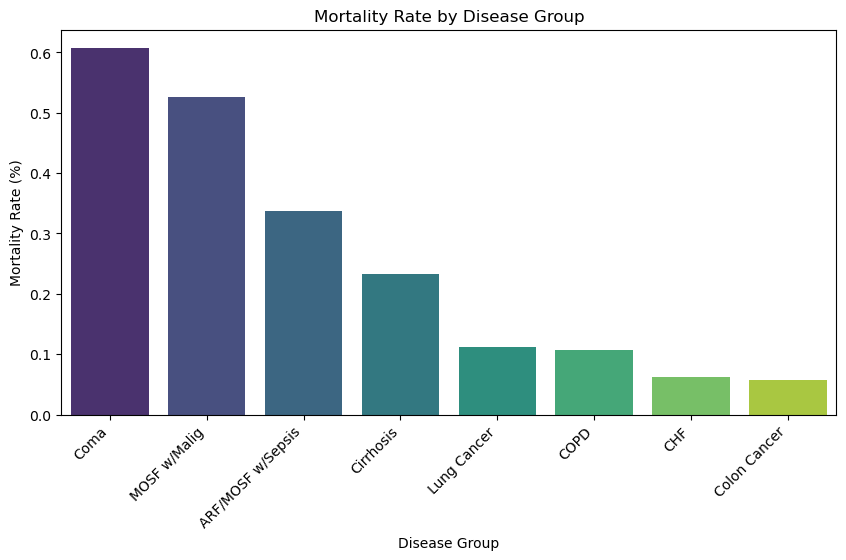

In [84]:
plt.figure(figsize=(10,5))

# Group diseases 
death_rates = clean_df.groupby('disease_subgroup')['hospital_death'].mean().sort_values(ascending=False)

sns.barplot(x=death_rates.index, y=death_rates.values, hue= death_rates.index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Disease Group')
plt.title('Mortality Rate by Disease Group')
plt.show()

* The bar chart shows that Coma had the highest rate of hospital mortality with 60%. It was follwed by MOSF w/Malig with 55%.
* These high levels of mortality rates are expected because the coma patients would have had low consciousness levels and the MOSF w/ Malig patients were severely ill due to multiple organ failure.
* ARF/MOSF w/Sepsis and Cirrhosis had an intermediate mortality rates with 35% and 25%.
* In this study the different types of cancer have a significantly less overall hospital mortality rate, such as with colon cancer having less than 10%. 

## 3.15 Total Cost Comparison Between Survival and Death Outcomes


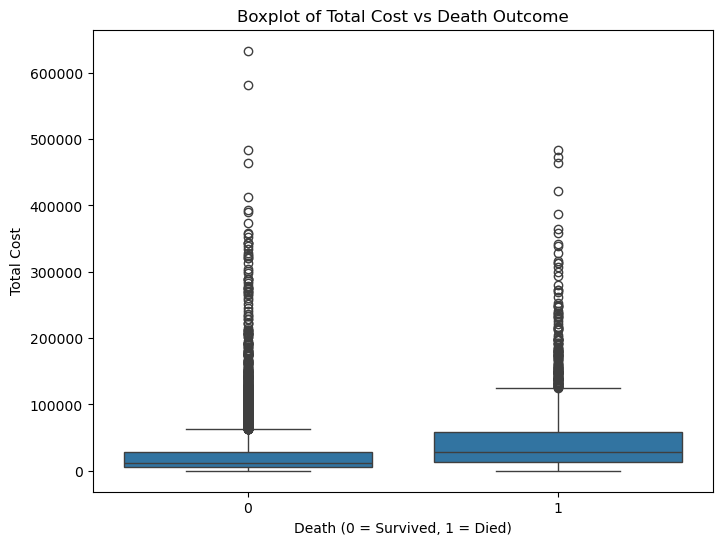

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='hospital_death', y='total_cost', data=clean_df)

plt.title("Boxplot of Total Cost vs Death Outcome")
plt.xlabel("Death (0 = Survived, 1 = Died)")
plt.ylabel("Total Cost")

plt.show()


- The box plot shows similar total costs for those who survived and died, with comparable medians and IQRs. This suggests total hospital costs does not differ dramaticically base don death outcome. 
- Both groups have extremely high cost outliers, meaning that some patients regardless of the outcome incurred high medical expenses.

## 3.16 Correlation Heatmap of All Numeric Variables


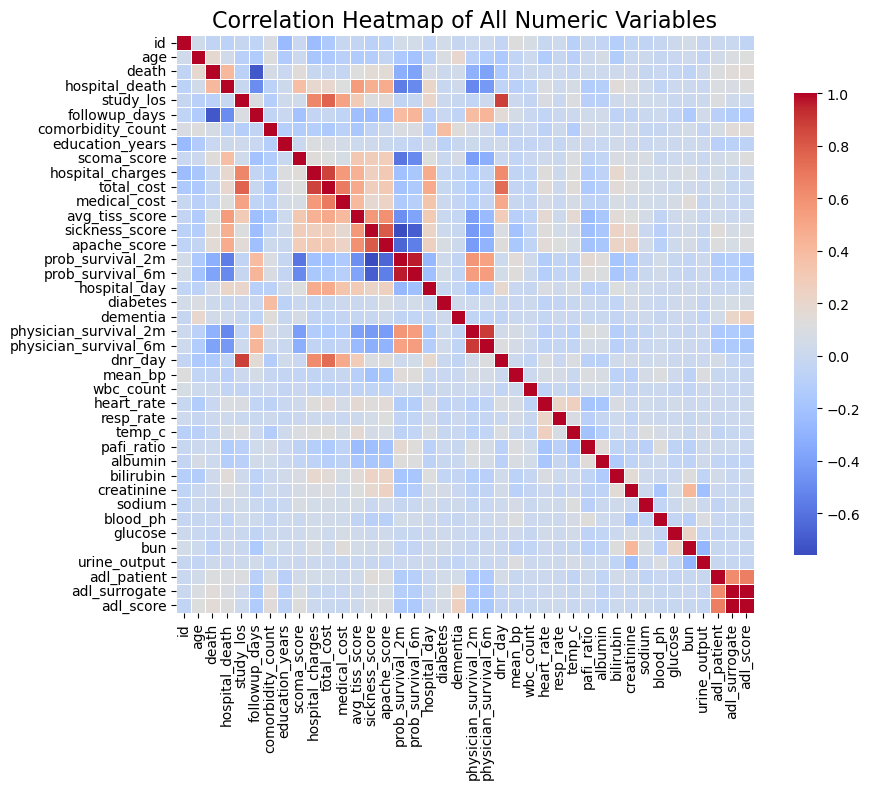

In [81]:
# Select numeric columns
numeric_df = clean_df.select_dtypes(include=['number'])

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})

plt.title("Correlation Heatmap of All Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()



- The heatmap showcases most variables weak linear correlations. Darker clusters of colours around ‘sickness_score, apache_score, prob_survival_2m, prob_survival_6m, total_ cost and medical_cost’ form a group of variables that all strongly correlate with each other, suggesting they capture related aspects of patient severity, costs or the clinical scoring for the dataset.
  
- Darker blue areas shows moderate negative correlations and these may represent higher severity scores corresponding to lower survival probabilities. Hospital_death shows small correlations with most other variables, with only a few moderate positive or negative relationships. This further implies death is not strongly linearly tied to many single variables. 

## 4. FINDINGS & CONCLUSION

## Keys Findings:

#### Clinincal & Phsiological Factors

1. SPS (Sickness Score) strongly predict the level of mortality; patients who have died have had a much higher SPS value.
2. Patients who died in hospital had much higher and more widely spread scoma scores than those who survived, indicating greater illness severity in the death group. 
3. Several extreme White Blood Cell (WBC) outliers suggest severe infections or sepsis amongst the sickest patients.
4. Glucose levels did not differ between survival groups, and correlations with mortality were near zero, indicating that glucose is not a strong predictor of outcomes.
5. Age strongly correlates with risk of death; mortality increases significantly above the age of 50 and peaks between the ages of 60 to 75.
6. Patients with three or more comorbidities are far more likely to die, confirming multiple illnesses greatly increases the risk.
7. There is no meaningful relationship between age and hospital stay length, as both short stays and long stays occur across all ages.
   
#### Cost & Resource Uses 

8. Most patients incurred low to moderate hospital charges with a small number of patients having extremely high expenses.
9. Total hospital costs were similar between survivors and non-survivors, with comparatively similar median and IQR values.
10. Extreme high cost outliers occurred in both groups, reflecting cases of prolonged stays, intensive treatment, or complex medical needs.

#### Cancer & Disease Subgroups
    
11. Non metastatic cancer patients showed higher hospital costs, likely due to active, ongoing treatment.
12. Metastatic cancer patients had lower costs, as care often shifts toward palliative management rather than intensive treatment.
13. Coma and MOSF with malignancy have the highest hospital mortality rates, while cancer diagnoses have much lower mortality compared to other critical conditions.
14. ARF/MOSF with sepsis occurs mainly in patients aged 60–80, likely due to weaker immune systems and reduced ability to recover from severe infections and organ failure in older adults.
15. ARF/MOSF with sepsis and Cirrhosis show moderate mortality rates of about 35% and 25%.


## Conclusion: 

The analysis of the dataset demonstrates that mortality in critically ill patients is driven primarily by clinical severity rather than demographic or administrative factors. Measures such as the Scoma score, SPS, and number of comorbidities showed strong relationships with death, while variables such as glucose, hospital cost, and length of stay, exhibited weak or no meaningful associations. 
Age was a major determinant of mortality risk, with death increasing sharply beyond age 50. Hospital costs were highly skewed but did not differ significantly between survivors and non-survivors, indicating that high expenditure reflects complexity of care rather than outcome. Disease subgroup analysis confirmed that advanced cancer, sepsis, and multi-organ failure carry the highest mortality burden. Correlation heatmaps further showed that illness severity scores cluster together as the strongest predictors of outcome. Overall, the dataset highlights the central role of physiological deterioration, multimorbidity, and age in shaping survival outcomes within this critically ill population.
